# Эксперимент с построением дерева с одним признаком возрастом

In [1]:
import os
import subprocess

from IPython import display
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from utils import decision_tree as dt
from utils import definitions as defs

In [2]:
df = pd.read_excel(defs.ETLED_DATA_PATH_step_2)

Y = df[defs.LABEL]
X = pd.DataFrame(df[defs.QUESTION_2])

## Моё дерево решений

In [3]:
my_tree = dt.DecisionTree(min_impurity_decrease=0.0)
my_tree.fit(
    X, Y,
    numerical_feature_names=[defs.QUESTION_2],
)

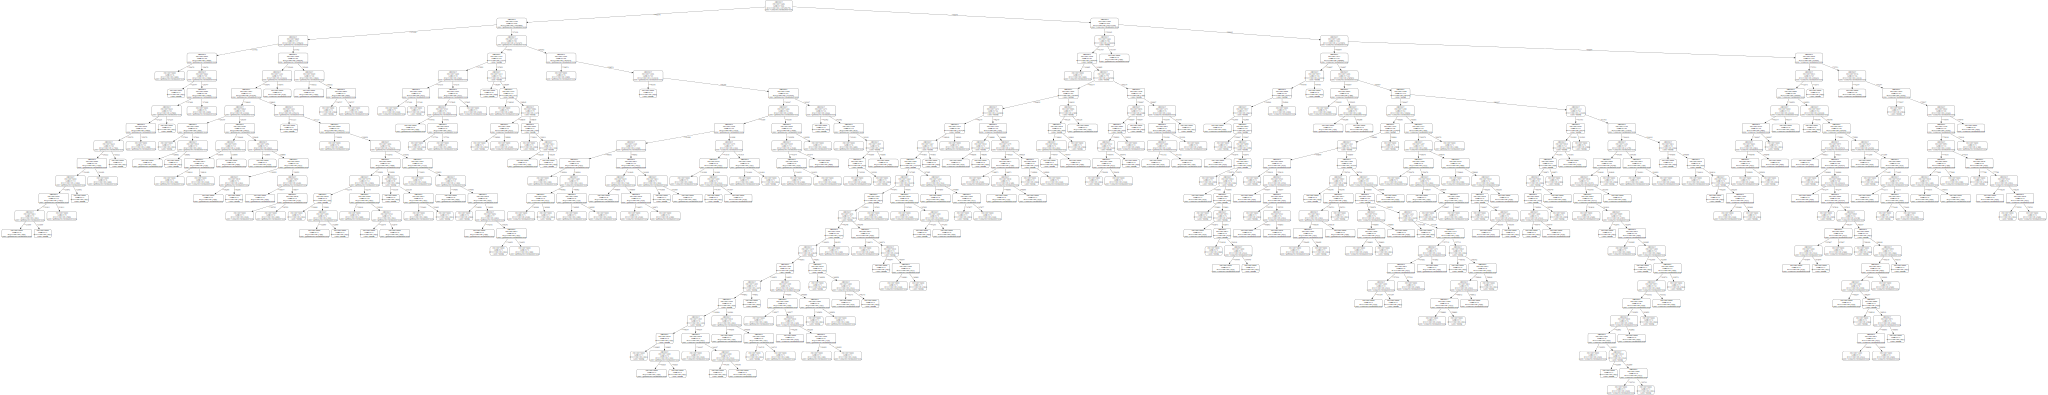

In [4]:
my_tree.render(
    rounded=True,
    show_impurity=True,
    show_num_samples=True,
    show_distribution=True,
    show_label=True,
    filename='my tree.gv',
    format='png',
)

In [5]:
display.Image('my tree.gv.png')

In [6]:
# Картинки встроены в jupyter notebook. Теперь удаляем файлы, чтобы они не засоряли проект.
os.remove('my tree.gv')
os.remove('my tree.gv.png')

## Дерево решений scikit-learn

In [7]:
sklearn_tree = DecisionTreeClassifier(criterion='entropy')
sklearn_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

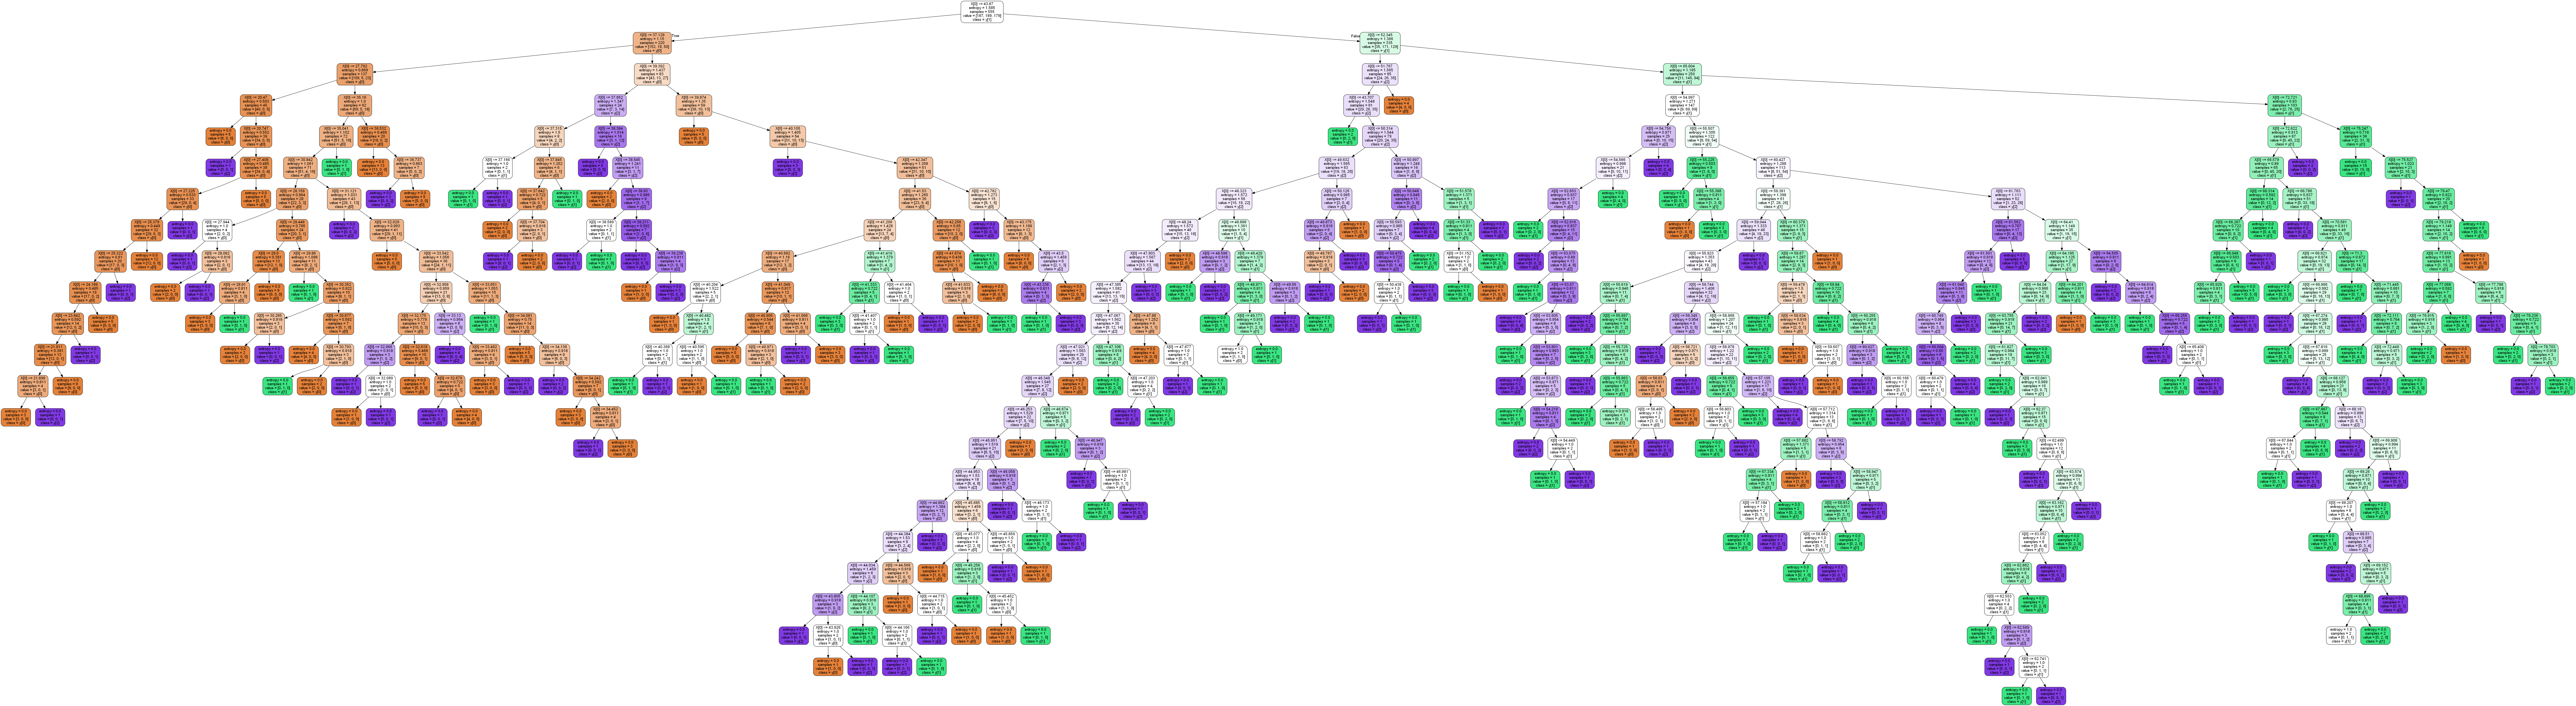

In [8]:
export_graphviz(
    sklearn_tree,
    out_file='tree.gv',
    class_names=True,
    filled=True,
    rounded=True,
)
# конвертируем из .gv в .png через командую строку
subprocess.call(['dot', '-Tpng', 'tree.gv', '-o', 'tree.png'])
display.Image('tree.png')

In [9]:
# Картинки встроены в jupyter notebook. Теперь удаляем файлы, чтобы они не засоряли проект.
os.remove('tree.gv')
os.remove('tree.png')